In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import requests
import json
import data_import

In [2]:
rest_df = data_import.get_rest_countries()

In [3]:
cia_df = data_import.get_cia_data()

In [4]:
merged_data = pd.merge(rest_df, cia_df, how = 'inner', on = 'Country')

In [5]:
merged_data.to_csv("merged_data.csv")

<h1> Josh's Workspace </h1>

In [6]:
pop_low = merged_data["Population"].quantile(0.1)
pop_hi  = merged_data["Population"].quantile(0.90)
edu_low = merged_data['Education_Expenditures'].quantile(0.01)
edu_hi = merged_data['Education_Expenditures'].quantile(0.99)


df_filtered = merged_data[(merged_data["Population"] < pop_hi) & (merged_data["Population"] > pop_low) & (merged_data['Education_Expenditures'] > edu_low) & (merged_data['Education_Expenditures'] < edu_hi)]

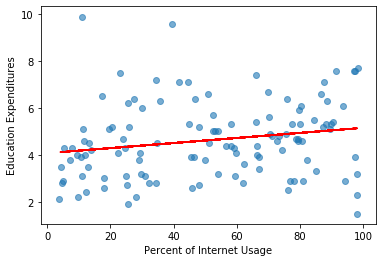

In [7]:
z = np.polyfit(df_filtered['Internet_%_of_Population'], df_filtered['Education_Expenditures'], 1)
p = np.poly1d(z)

plt.plot(df_filtered['Internet_%_of_Population'],p(df_filtered['Internet_%_of_Population']),"r--")
plt.scatter(df_filtered['Internet_%_of_Population'], df_filtered['Education_Expenditures'], alpha = .6)
plt.xlabel('Percent of Internet Usage')
plt.ylabel('Education Expenditures')

plt.show()

In [8]:
sub_df = df_filtered[['Sub-Region', 'Internet_%_of_Population', 'Median_age', 'Education_Expenditures']]

In [9]:
sub_df = sub_df.groupby('Sub-Region').mean()

In [10]:
sub_df.head()

,Internet_%_of_Population,Median_age,Education_Expenditures
Sub-Region,,,
Australia and New Zealand,88.350000,38.450000,5.800000
Caribbean,61.414286,34.571429,4.814286
Central America,40.385714,26.357143,4.942857
Central Asia,39.320000,27.980000,4.940000
Eastern Africa,24.375000,21.841667,4.525000


<h1>Daniela's Workspace</h1>

<h1>Cesar's Workspace</h1>

<h1>Claudia's Workspace</h1>